In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.arima.model import ARIMA

In [4]:
netflix = pd.read_csv('nflx.csv')
netflix.head(5)

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
netflix.describe()

Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [24]:
netflix.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
netflix.shape

(1009, 7)

In [26]:
netflix.duplicated().sum()

0

In [32]:
#Change date from object to date/time & Setting date as index
netflix['Date'] = pd.to_datetime(netflix['Date'])
netflix = netflix.sort_values('Date')
netflix.set_index('Date', inplace=True)
netflix.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

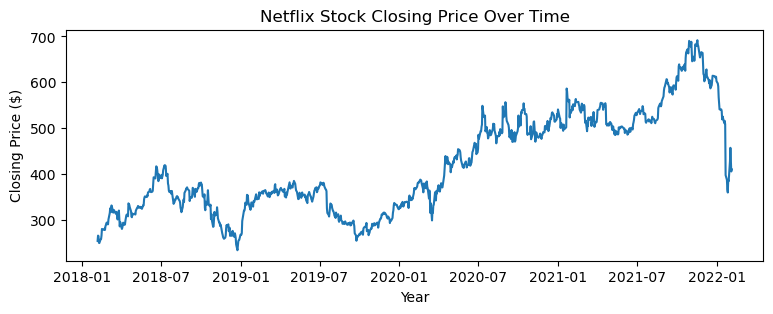

In [38]:
plt.figure(figsize=(9,3))
plt.plot(netflix['Close'])
plt.title('Netflix Stock Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price ($)')
plt.show()

# Insights--> Trend in Closing Price
# --> Netflix stock shows a strong uptrend from 2018 to late 2021.
# --> There is a sharp drop in 2022, reflecting when Netflix announced subscriber losses and markets reacted.
# --> After 2022, the stock slowly began recovering in 2023–2024.

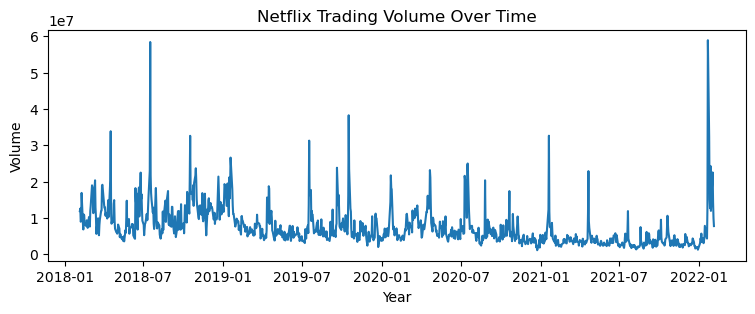

In [40]:
plt.figure(figsize=(9,3))
plt.plot(netflix['Volume'])
plt.title('Netflix Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

# Insight --> Trading Volume Behavior
# --> Trading volume spikes during major events (e.g. earnings announcements, stock drops).
# --> You may notice higher trading volume during price crashes — showing panic selling.
# --> After large crashes, volume usually drops back to normal levels.

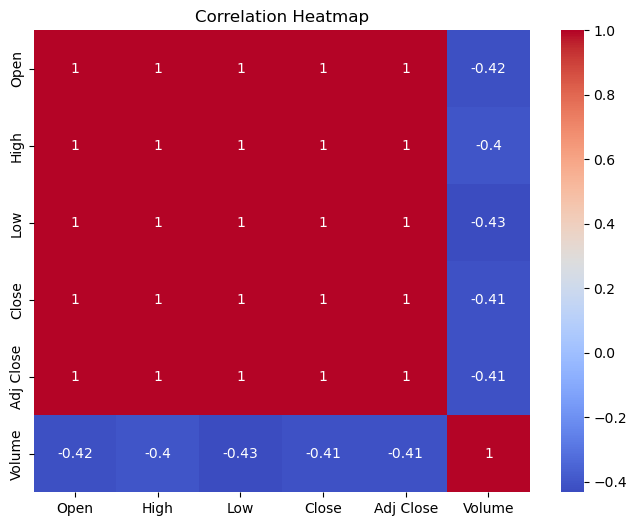

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(netflix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insights
# Open --> Very High (~0.99)	Highly related
# High --> Very High (~0.99)	Strongly moves with Close
# Low  --> Very High (~0.99)	Strong relationship
# Volume --> Weak correlation	Not strongly affecting price trend